In [6]:
from tensorflow import keras
from tensorflow.keras import layers
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = layers.MaxPooling2D(pool_size=2)(x)
x = layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = layers.Flatten()(x)
outputs = layers.Dense(10, activation="softmax")(x)
model = keras.Model(inputs=inputs, outputs=outputs)

In [7]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 128)         7385

In [9]:
from tensorflow.keras.datasets import cifar10
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()
train_images = train_images.astype("float32") / 255
test_images = test_images.astype("float32") / 255
model.compile(optimizer="rmsprop", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.fit(train_images, train_labels, epochs=60, batch_size=64)

Epoch 1/60
782/782 [==============================] - 5s 5ms/step - loss: 0.0963 - accuracy: 0.9666
Epoch 2/60
782/782 [==============================] - 3s 4ms/step - loss: 0.0880 - accuracy: 0.9686
Epoch 3/60
782/782 [==============================] - 3s 4ms/step - loss: 0.0853 - accuracy: 0.9703
Epoch 4/60
782/782 [==============================] - 3s 4ms/step - loss: 0.0853 - accuracy: 0.9706
Epoch 5/60
782/782 [==============================] - 4s 5ms/step - loss: 0.0812 - accuracy: 0.9722
Epoch 6/60
782/782 [==============================] - 3s 4ms/step - loss: 0.0795 - accuracy: 0.9732
Epoch 7/60
782/782 [==============================] - 3s 4ms/step - loss: 0.0766 - accuracy: 0.9733
Epoch 8/60
782/782 [==============================] - 4s 5ms/step - loss: 0.0780 - accuracy: 0.9739
Epoch 9/60
782/782 [==============================] - 3s 4ms/step - loss: 0.0735 - accuracy: 0.9743
Epoch 10/60
782/782 [==============================] - 3s 4ms/step - loss: 0.0724 - accuracy: 0.9744

#Model Evaluation

313/313 [==============================] - 1s 4ms/step - loss: 5.4616 - accuracy: 0.7038
Test Accuracy : 70.38%
313/313 [==============================] - 1s 2ms/step


ValueError: ignored

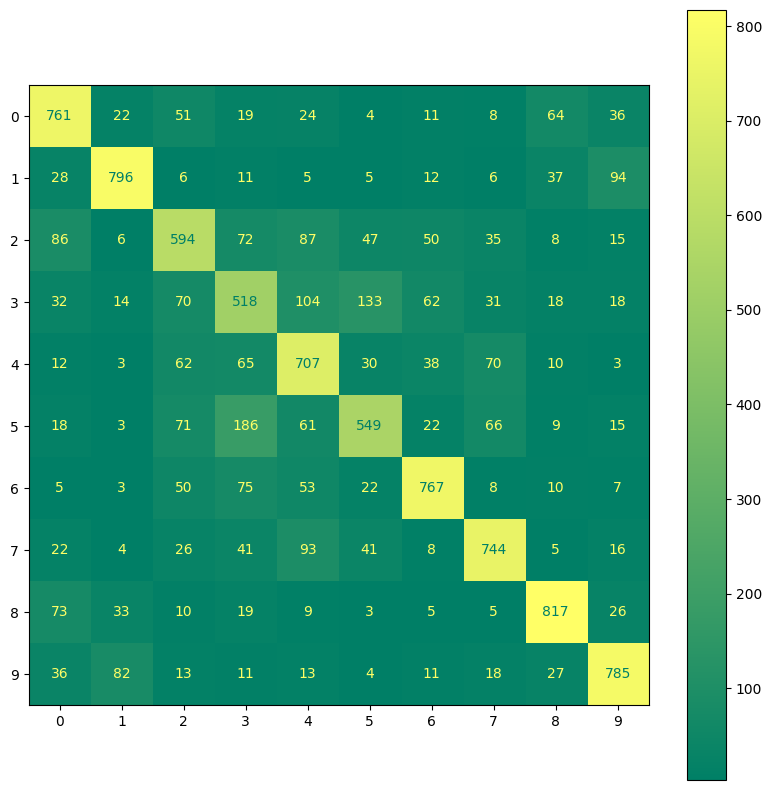

In [13]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt

evaluation = model.evaluate(test_images, test_labels)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

y_pred = model.predict(test_images)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(test_labels, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=test_labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()